# Programming Exercise 2- Regularized logistic regression

In [1]:
# imports here

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### Visualizing the data

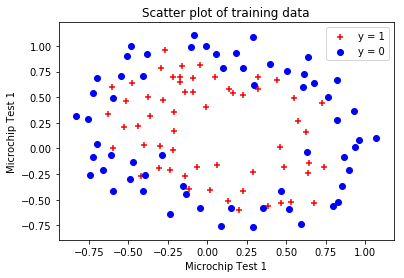

In [2]:
def plot_data():
    from numpy import loadtxt, where
    from pylab import scatter, show, legend, xlabel, ylabel

    #load the dataset
    data = loadtxt('ex2data2.txt', delimiter=',')

    X = data[:, 0:2]
    y = data[:, 2]

    pos = where(y == 1)
    neg = where(y == 0)
    scatter(X[pos, 0], X[pos, 1], marker='+', c='r')
    scatter(X[neg, 0], X[neg, 1], marker='o', c='b')
    xlabel('Microchip Test 1')
    ylabel('Microchip Test 1')
    legend(['y = 1', 'y = 0'])
    plt.title('Scatter plot of training data')
    show()
    
plot_data()

### Feature mapping
One way to fit the data better is to create more features from each data point. In the function mapFeature, we will map the features into all polynomial terms of $x_{1}$ and $x_{2}$ up to the sixth power.

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot. While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for
yourself how regularization can help combat the overfitting problem.

In [3]:
data = pd.read_csv("ex2data2.txt", header=None, names=['X1', 'X2', 'y'])
data.head()

,X1,X2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
X = data[['X1', 'X2']]
y = data['y']

In [5]:
X.head()

,X1,X2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [6]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1), 1)
    for i in range(1, degree+1):
        for j in range(0, i+1):
            terms = (x1**(i-j) * x2**j).reshape(len(x1), 1)
            out = np.hstack((out,terms))
    return out

X = mapFeature(X.X1.values, X.X2.values, 6)

In [7]:
X.shape

(118, 28)

In [8]:
y = y.values.reshape((y.shape[0], 1))
y.shape

(118, 1)

## Cost function and gradient
Now you will implement code to compute the cost function and gradient for regularized logistic regression.

Recall that the regularized cost function in logistic regression is $J(\theta) = \frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda }{2m}\sum_{j=1}^{n}\theta _{j}^{2}$ . Note that you should not regularize the parameter $\theta _{0}$ . 

The gradient of the cost function is a vector where the j th element is defined as follows: $\frac{\partial J(\theta )}{\partial \theta _{j}} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta }(x^{(i)})-y^{(i)})x_{j}^{(i)}$ for j = 0 and $\frac{\partial J(\theta )}{\partial \theta _{j}} = (\frac{1}{m}\sum_{i=1}^{m}(h_{\theta }(x^{(i)})-y^{(i)})x_{j}^{(i)}) + \frac{\lambda }{m}\theta _{j}$ for j >= 1

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid(0)

0.5

In [10]:
def costFunctionReg(theta, X, y, Lambda):
    m = y.shape[0]
    
    h_theta = sigmoid(np.matmul(X, theta))
    error = np.matmul(y.T, np.log(h_theta)) + np.matmul((1-y).T, np.log(1 - h_theta))
    J = (-error / m) + (Lambda/(2*m)) * np.matmul(theta[1:].T, theta[1:])
    
    theta_ = theta
    theta_[0] = 0

    grad = (np.matmul(X.T, (h_theta-y)) / m) + ((Lambda/m) * theta_)
    
    return (J, grad)

In [11]:
initial_theta = np.zeros((X.shape[1], 1))
# Lambda = 1
initial_theta.shape

(28, 1)

In [12]:
cost, grad = costFunctionReg(initial_theta, X, y, Lambda=1)
print(cost)
print(grad)

[[0.69314718]]
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]
 [3.76648474e-02]
 [1.83559872e-02]
 [7.32393391e-03]
 [8.19244468e-03]
 [2.34764889e-02]
 [3.93486234e-02]
 [2.23923907e-03]
 [1.28600503e-02]
 [3.09593720e-03]
 [3.93028171e-02]
 [1.99707467e-02]
 [4.32983232e-03]
 [3.38643902e-03]
 [5.83822078e-03]
 [4.47629067e-03]
 [3.10079849e-02]
 [3.10312442e-02]
 [1.09740238e-03]
 [6.31570797e-03]
 [4.08503006e-04]
 [7.26504316e-03]
 [1.37646175e-03]
 [3.87936363e-02]]


### Learning parameters

In [13]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m = y.shape[0]
    J_history = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        cost, grad = costFunctionReg(theta, X, y, Lambda)
        theta = theta - (alpha * grad)
        J_history[i] = cost
    
    return (theta, J_history)

num_iters = 100000

theta, J_history = gradientDescent(X, y, initial_theta, 1, num_iters, 1)

In [14]:
x_values = np.array(range(1, num_iters+1)).reshape((num_iters, 1))
print(x_values.shape)
print(J_history.shape)

(100000, 1)
(100000, 1)


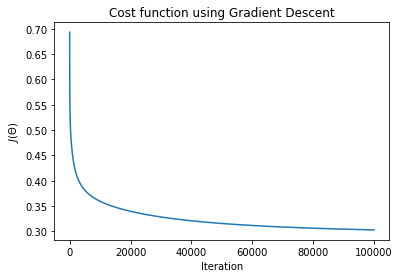

In [15]:
plt.plot(x_values, J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

### Evaluating logistic regression

In [16]:
def classifierPredict(theta, X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = np.matmul(X, theta)
    
    return predictions > 0

p = classifierPredict(theta, X)
m = y.shape[0]
print("Train Accuracy: {} %".format(float(sum(p==y)) / m))

Train Accuracy: 0.864406779661 %


### Plotting the decision boundary

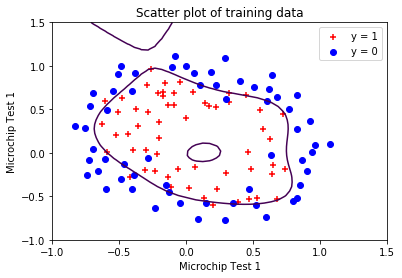

In [17]:
def plot_decision_boundary(theta):
    from numpy import loadtxt, where
    from pylab import scatter, show, legend, xlabel, ylabel

    #load the dataset
    data = loadtxt('ex2data2.txt', delimiter=',')

    X = data[:, 0:2]
    y = data[:, 2]

    pos = where(y == 1)
    neg = where(y == 0)
    scatter(X[pos, 0], X[pos, 1], marker='+', c='r')
    scatter(X[neg, 0], X[neg, 1], marker='o', c='b')
    xlabel('Microchip Test 1')
    ylabel('Microchip Test 1')
    legend(['y = 1', 'y = 0'])
    plt.title('Scatter plot of training data')
    
    def mapFeaturePlot(x1,x2,degree):
        """
        take in numpy array of x1 and x2, return all polynomial terms up to the given degree
        """
        out = np.ones(1)
        for i in range(1, degree+1):
            for j in range(i+1):
                terms = (x1**(i-j) * x2**j)
                out = np.hstack((out,terms))
        return out

    u_vals = np.linspace(-1, 1.5, 50)
    v_vals= np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u_vals), len(v_vals)))
    for i in range(len(u_vals)):
        for j in range(len(v_vals)):
            z[i, j] = np.matmul(mapFeaturePlot(u_vals[i], v_vals[j], 6), theta)

    plt.contour(u_vals, v_vals, z.T, 0)
    
    show()
    
plot_decision_boundary(theta)

### Checking for different $\lambda$

In [18]:
def tuning(X, y, alpha, Lambda):
    
    num_iters = 100000
    initial_theta = np.zeros((X.shape[1], 1))
    theta, J_history = gradientDescent(X, y, initial_theta, alpha, num_iters, Lambda)
    
    x_values = np.array(range(1, num_iters+1)).reshape((num_iters, 1))
    plt.plot(x_values, J_history)
    plt.xlabel("Iteration")
    plt.ylabel("$J(\Theta)$")
    plt.title("Cost function using Gradient Descent")
    plt.show()
    
    p = classifierPredict(theta, X)
    m = y.shape[0]
    print("Train Accuracy: {} %".format(float(sum(p==y)) / m))
    
    plot_decision_boundary(theta)